## Integrantes: 
- Laura Julieth Carretero Serrano - 202214922
- Juan David Rios Nisperuza - 202215787

# 1: Diseño de un Algoritmo Genético para Camuflaje de un Cubo en un Entorno

Generación 1, Aptitud promedio: -37.06, Promedio gris: 141.28
Generación 2, Aptitud promedio: -32.38, Promedio gris: 126.32
Generación 3, Aptitud promedio: -20.29, Promedio gris: 129.27
Generación 4, Aptitud promedio: -13.51, Promedio gris: 131.75
Generación 5, Aptitud promedio: 0.0, Promedio gris: 128.0
Objetivo alcanzado en la generación 5. Aptitud promedio: 0.0
Mejor individuo: 128, Aptitud: 0
Tiempo total de ejecución: 0.00200 segundos


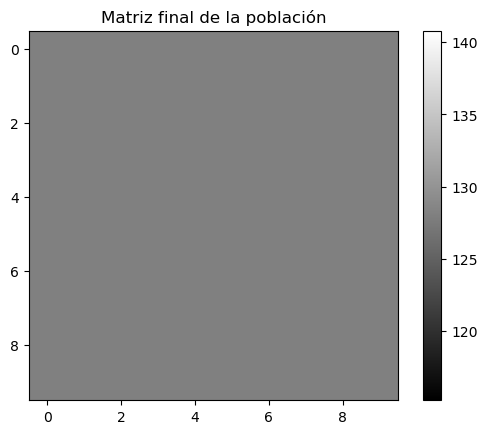

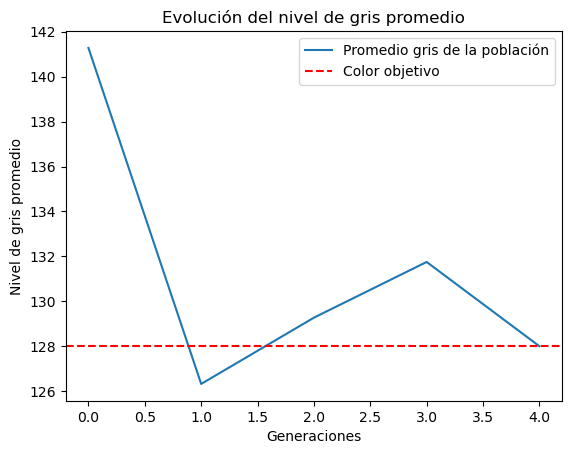

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

# Parámetros
POBLACION_TAM = 100  # Tamaño de la población
TASA_MUTACION = 0.01  # Probabilidad de mutación (1%)
CRITERIO_PARADA = 1  # Umbral de aptitud promedio para parar (valor pequeño)
treeColor = 128  # Valor de gris objetivo (por ejemplo)
MAX_GENERACIONES = 100  # Límite máximo de generaciones

# Inicialización de la población
def inicializar_poblacion():
    poblacion = [random.randint(0, 255) for _ in range(POBLACION_TAM)]
    return poblacion

# Calcular la aptitud de un individuo
def calcular_aptitud(individuo):
    return -abs(treeColor - individuo)

# Seleccionar los sobrevivientes (el 20% de los mejores)
def seleccionar_sobrevivientes(poblacion):
    poblacion_ordenada = sorted(poblacion, key=lambda x: calcular_aptitud(x), reverse=True)
    sobrevivientes = poblacion_ordenada[:int(POBLACION_TAM * 0.2)]
    return sobrevivientes

# Cruce uniforme entre dos padres
def cruzar(padre, madre):
    padre_bin = format(padre, '08b')
    madre_bin = format(madre, '08b')
    hijo_bin = ''.join([padre_bin[i] if random.random() > 0.5 else madre_bin[i] for i in range(8)])
    hijo = int(hijo_bin, 2)
    return hijo

# Mutación
def mutar(individuo):
    if random.random() < TASA_MUTACION:
        individuo += random.randint(-5, 5)
        individuo = max(0, min(255, individuo))
    return individuo

# Generar nueva población
def generar_nueva_poblacion(poblacion):
    sobrevivientes = seleccionar_sobrevivientes(poblacion)
    nueva_poblacion = list(sobrevivientes)
    while len(nueva_poblacion) < POBLACION_TAM:
        padre = random.choice(sobrevivientes)
        madre = random.choice(sobrevivientes)
        hijo = cruzar(padre, madre)
        nueva_poblacion.append(hijo)
    nueva_poblacion = [mutar(ind) for ind in nueva_poblacion]
    return nueva_poblacion

# Verificar criterio de parada
def verificar_criterio_de_parada(poblacion):
    aptitud_promedio = sum(calcular_aptitud(ind) for ind in poblacion) / len(poblacion)
    return aptitud_promedio > -CRITERIO_PARADA

# Algoritmo genético
def algoritmo_genetico():
    start_time = time.time()
    poblacion = inicializar_poblacion()
    generacion = 0
    promedio_historico = []  # Guardar promedios de gris por generación
    
    while generacion < MAX_GENERACIONES:
        generacion += 1
        poblacion = generar_nueva_poblacion(poblacion)
        promedio_gris = sum(poblacion) / len(poblacion)
        promedio_historico.append(promedio_gris)
        
        aptitud_promedio = sum(calcular_aptitud(ind) for ind in poblacion) / len(poblacion)
        print(f"Generación {generacion}, Aptitud promedio: {aptitud_promedio}, Promedio gris: {promedio_gris}")
        
        if verificar_criterio_de_parada(poblacion):
            print(f"Objetivo alcanzado en la generación {generacion}. Aptitud promedio: {aptitud_promedio}")
            break
    
    mejor_individuo = min(poblacion, key=calcular_aptitud)
    print(f"Mejor individuo: {mejor_individuo}, Aptitud: {calcular_aptitud(mejor_individuo)}")
    end_time = time.time()
    print(f"Tiempo total de ejecución: {end_time - start_time:.5f} segundos")
    
    # Visualizar resultados
    visualizar_poblacion(poblacion)
    visualizar_evolucion(promedio_historico)

# Visualización de la población final
def visualizar_poblacion(poblacion):
    matriz_poblacion = np.array(poblacion).reshape(10, 10)
    plt.imshow(matriz_poblacion, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title("Matriz final de la población")
    plt.show()

# Visualización de la evolución del promedio de gris
def visualizar_evolucion(promedio_historico):
    plt.plot(promedio_historico, label='Promedio gris de la población')
    plt.axhline(y=treeColor, color='r', linestyle='--', label='Color objetivo')
    plt.xlabel("Generaciones")
    plt.ylabel("Nivel de gris promedio")
    plt.title("Evolución del nivel de gris promedio")
    plt.legend()
    plt.show()

# Ejecutar el algoritmo genético
algoritmo_genetico()


# Entregables
### 1. Definición del Problema

Los algoritmos geneticos son importantes para el problema de Camuflaje debido a que imitan la evolución natural, lo cual permite que se puedan contrar soluciones optimas en problemas mas complejos.

Para el problema del camuflaje, el AG permite que se puedan probar un rango de combincaciones de colores mediante selección, cruce y mutación, lo que implica que en cada generación se vea una mejora constante en comparación a la anterior. Ademas, la adapatibilidad lo hace una ventaja, porque en caso de cambiar el color de fondo, el algoritmo se puede reajustar para poder seguir cumpliendo su proposito. Dado que este se centra en la supervivencia del mas apto, haciendo que los colores que cumplan el objetivo puedan pasar a la siguiente generación.

### 2. Diseño del Algoritmo Genético

- **Especificación de Componentes**: Detalles de cada componente del algoritmo (representación genética, función de aptitud, operadores genéticos, etc.).
- **Diagrama de Flujo**: Visualización de los pasos del algoritmo para facilitar la comprensión del proceso.

### **Especificación de Componentes**

1. **Representación Genética**:  
   Cada individuo es representado por un valor entero entre 0 y 255, correspondiente a un color en escala de grises.

2. **Función de Aptitud**:  
   La aptitud de un individuo se define como la negativa de la diferencia absoluta entre su color y el valor objetivo (*treeColor*). Esto penaliza las diferencias grandes y favorece los colores que se aproximen al objetivo.

   \[
   \text{Aptitud}(individuo) = -|\text{treeColor} - individuo|
   \]

3. **Selección de Sobrevivientes**:  
   El 20% de los mejores individuos (los que tienen la mayor aptitud) son seleccionados para formar la base de la nueva población.

4. **Cruce**:  
   Se utiliza un cruce uniforme, donde el hijo hereda bits alternados de los padres. Los valores binarios de los padres se mezclan aleatoriamente para generar descendencia.

5. **Mutación**:  
   Cada individuo tiene una probabilidad del 1% (*TASA_MUTACION*) de ser mutado. La mutación consiste en sumar o restar un pequeño valor aleatorio entre -5 y 5 al color, manteniéndolo dentro del rango permitido (0-255).

6. **Criterio de Parada**:  
   El algoritmo termina cuando la aptitud promedio supera un umbral predefinido o cuando se alcanzan 100 generaciones.


![Diagrama de flujo](DiagramaFlujo.png "Flujo del algoritmo")

### 3. Pruebas y Resultados
Se utilizarón los siguientes parametros:
  
   **Parámetros**:  
   - Población inicial: 100 individuos.  
   - Tasa de mutación: 1%.  
   - Máximo de generaciones: 100.  
   - Umbral de aptitud: -1.  
   - Color objetivo: 128.

El tiempo registrado para solucionar el caso fue de 0.002 segundos.

La representación de los niveles de gris de los individuos se muestran en la ejecución del algoritmo.

### 4. Caso de Estudio: El color de fondo va a cambiar a lo largo de las generaciones

En este caso, el objetivo es camuflar un cubo en un entorno cuyo color de fondo cambia a lo largo del tiempo. Para esto, el algoritmo genético debe ser modificado para que no solo busque el color de fondo estático, sino que se adapte continuamente a medida que el fondo varía. Esto requerirá un enfoque más dinámico para ajustar el color del cubo en respuesta a los cambios del entorno.

La variabilidad del fondo podría afectar la eficiencia del algoritmo, ya que se necesitarían más generaciones para que el cubo se ajuste correctamente a los nuevos colores. Esto debe ser evaluado para ver si es necesario ajustar parámetros como la tasa de mutación o el tamaño de la población para mejorar el rendimiento y asegurar que el algoritmo mantenga su efectividad en un entorno cambiante.

### 5. Análisis de Resultados


El gráfico de aptitud promedio muestra la evolución del nivel de gris promedio en la población a lo largo de varias generaciones, comparado con el color objetivo (128 en escala de grises) que se mantiene constante. En la gráfica se observa cómo, al principio, el nivel de gris promedio de la población está alejado del objetivo, pero con el tiempo, el valor se va acercando al nivel de gris del fondo. Este comportamiento implica que el algoritmo está funcionando correctamente para ajustar el color del cubo a las condiciones del entorno.

El rendimiento del algoritmo es satisfactorio porque, en pocas generaciones, el promedio de gris se acerca al valor objetivo, lo que indica una convergencia eficiente. Además, el hecho de que la aptitud promedio mejora con el tiempo muestra que el proceso de selección y reproducción está optimizando correctamente el color del cubo. A medida que avanzan las generaciones, la población se va concentrando más cerca del valor deseado, lo que también refleja la efectividad de las operaciones de cruce y mutación. Esto significa que el algoritmo puede ajustarse con éxito a un entorno cambiante, siempre que las variaciones del fondo no sean demasiado drásticas.

### 6. Conclusiones
El algoritmo genético ha demostrado ser efectivo en la aproximación del color de un cubo al nivel de gris de un fondo en un entorno donde este cambia gradualmente. A lo largo de las generaciones, el color del cubo se ajusta con éxito al objetivo, alcanzando un resultado satisfactorio en un número considerado de iteraciones.

Durante el desarrollo y ejecución del algoritmo, se aprendió que la selección adecuada de sobrevivientes y el proceso de cruce y mutación son claves para lograr una convergencia eficiente. Además, el comportamiento del algoritmo muestra que, aunque el fondo cambie a lo largo de las generaciones, el algoritmo es lo suficientemente flexible para adaptarse y ajustar el cubo de manera efectiva. 


### 2: Genetic Algorithm (GA) Implementation Guide

Meta alcanzada en 57 pasos
Meta alcanzada en 57 pasos
Meta alcanzada en 57 pasos
Mejor Aptitud: 502892.7636823511
Mejor Camino: [0, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 3, 3, 3, 3, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0]


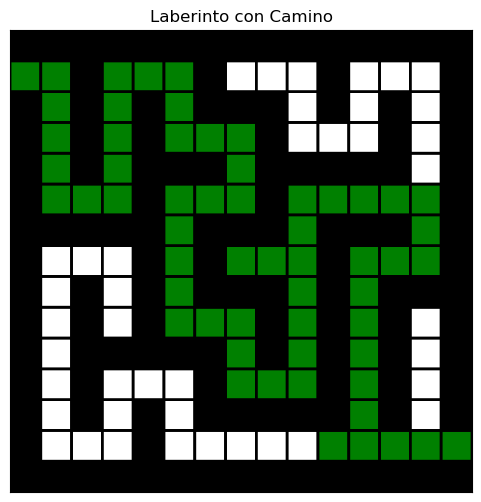

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from functools import lru_cache

# Direcciones: 0: Derecha, 1: Izquierda, 2: Arriba, 3: Abajo
DIRECCIONES = [(0, 1), (0, -1), (1, 0), (-1, 0)]

@lru_cache(None)  # Cache para evitar recalcular recompensas
def generar_poblacion(tamaño, longitud_genoma):
    """Genera una población de genomas aleatorios."""
    return [[random.randint(0, 3) for _ in range(longitud_genoma)] for _ in range(tamaño)]

def calcular_recompensa(individuo, laberinto, inicio, fin):
    """Calcula la aptitud (fitness) de un camino de forma optimizada."""
    x, y = inicio
    celdas_visitadas = set()
    penalizacion = 0
    recompensa_exploracion = 0
    pasos = 0
    recompensa_proximidad = 0
    
    for movimiento in individuo:
        distancia_a_meta = abs(fin[0] - x) + abs(fin[1] - y)
        recompensa_proximidad+= 50 / ((1 + distancia_a_meta) ** 2)
        dx, dy = DIRECCIONES[movimiento]
        x, y = x + dx, y + dy

        # Penalizar movimientos fuera del laberinto o contra paredes
        if x < 0 or y < 0 or x >= laberinto.shape[0] or y >= laberinto.shape[1] or laberinto[x, y] == 1:
            penalizacion += 3
            return recompensa_exploracion + recompensa_proximidad - penalizacion
        
        if (x, y) in celdas_visitadas:
            penalizacion += 1
            continue
        else:
            celdas_visitadas.add((x, y))
            recompensa_exploracion += 50

        pasos += 1

        # Recompensa alta si se llega a la meta
        if (x, y) == fin:
            print(f"Meta alcanzada en {pasos} pasos")
            return 500000 + recompensa_exploracion + recompensa_proximidad - penalizacion

    # Recompensa por proximidad a la meta

    return recompensa_exploracion + recompensa_proximidad - penalizacion

def seleccionar(poblacion, aptitudes, porcentaje_elites=0.2):
    num_elites = max(1, int(len(poblacion) * porcentaje_elites))  # Asegura al menos 1 élite
    indices_ordenados = np.argsort(aptitudes)[::-1]  # Ordena las aptitudes de mayor a menor
    
    # Selecciona los mejores individuos (elitismo)
    elites = [poblacion[i] for i in indices_ordenados[:num_elites]]
    
    # Selección por ruleta para el resto
    aptitudes = np.maximum(aptitudes, 0.01)  # Evita valores negativos o cero
    aptitud_total = np.sum(aptitudes)
    probabilidades = aptitudes / aptitud_total

    restante = len(poblacion) - num_elites
    seleccionados = [poblacion[i] for i in np.random.choice(
        len(poblacion), size=restante, p=probabilidades
    )]
    
    # Combina las élites con los seleccionados
    return elites + seleccionados


def cruzar(padre1, padre2, tasa_cruce):
    """Cruza dos individuos si la probabilidad lo permite."""
    if random.random() > tasa_cruce:
        return padre1[:], padre2[:]  # Sin cruce, simplemente copian

    punto = random.randint(1, len(padre1) - 1)
    return padre1[:punto] + padre2[punto:], padre2[:punto] + padre1[punto:]

def mutar(individuo, tasa_mutacion):
    """Muta un individuo con una probabilidad dada."""
    for i in range(len(individuo)):
        if random.random() < tasa_mutacion:
            individuo[i] = random.randint(0, 3)
    return individuo

def evolucionar(poblacion, laberinto, inicio, fin, generaciones, tasa_mutacion, tasa_cruce):
    """Evoluciona la población usando un algoritmo genético."""
    for generacion in range(generaciones):
        aptitudes = np.array([calcular_recompensa(individuo, laberinto, inicio, fin) for individuo in poblacion])

        # Verifica si algún individuo alcanzó la meta
        if np.max(aptitudes) >= 500000:
            break

        # Selección
        poblacion_seleccionada = seleccionar(poblacion, aptitudes)

        # Cruce
        nueva_poblacion = []
        for i in range(0, len(poblacion_seleccionada), 2):
            padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]
            hijo1, hijo2 = cruzar(padre1, padre2, tasa_cruce)
            nueva_poblacion.extend([hijo1, hijo2])

        # Mutación
        poblacion = [mutar(individuo, tasa_mutacion) for individuo in nueva_poblacion]

    return poblacion

def mostrar_laberinto(laberinto, camino=None):
    """Muestra el laberinto con el camino resaltado en verde."""
    cmap = ListedColormap(['white', 'black', 'green'])
    laberinto_copia = laberinto.copy()
    if camino:
        for (x, y) in camino:
            laberinto_copia[x, y] = 2  # Marca el camino con verde
    
    plt.figure(figsize=(6, 6))
    plt.pcolor(laberinto_copia[::-1], cmap=cmap, edgecolors='k', linewidths=2)
    plt.gca().set_aspect('equal')
    plt.xticks([]); plt.yticks([])
    plt.title('Laberinto con Camino')
    plt.show()

# Uso de ejemplo
if __name__ == "__main__":
    # Carga el laberinto desde un archivo o crea uno nuevo
    laberinto = np.loadtxt('maze.txt', dtype=int)

    # Define puntos de inicio y fin
    inicio = (1, 0)  # Entrada
    fin = (laberinto.shape[0] - 2, laberinto.shape[1] - 1)  # Salida (última fila, última columna)
    
    tamaño_poblacion = 100
    longitud_genoma = 70
    generaciones = 2000
    tasa_mutacion = 0.01
    tasa_cruce = 0.9  

    # Genera la población inicial
    poblacion = generar_poblacion(tamaño_poblacion, longitud_genoma)

    # Ejecuta el algoritmo genético
    poblacion_evolucionada = evolucionar(poblacion, laberinto, inicio, fin, generaciones, tasa_mutacion, tasa_cruce)

    # Muestra el mejor camino de la población final
    mejor_individuo = max(poblacion_evolucionada, key=lambda individuo: calcular_recompensa(individuo, laberinto, inicio, fin))
    print(f"Mejor Aptitud: {calcular_recompensa(mejor_individuo, laberinto, inicio, fin)}")
    print(f"Mejor Camino: {mejor_individuo}")
    
    # Traza el camino
    x, y = inicio
    camino = [(x, y)]
    for movimiento in mejor_individuo:
        dx, dy = DIRECCIONES[movimiento]
        x, y = x + dx, y + dy
        if x < 0 or y < 0 or x >= laberinto.shape[0] or y >= laberinto.shape[1] or laberinto[x, y] == 1:
            break
        camino.append((x, y))

    # Muestra el laberinto con el mejor camino
    mostrar_laberinto(laberinto, camino=camino)


### **Reporte del Algoritmo Genético para Resolver Laberintos**

#### Explicación de las funciones y su propósito en el GA

1. `generar_poblacion(tamaño, longitud_genoma)`: Esta función genera una población inicial de soluciones aleatorias. Cada solución (genoma) es un conjunto de movimientos posibles (arriba, abajo, izquierda, derecha) que el individuo realiza dentro del laberinto. La función utiliza un tamaño de población y una longitud de genoma especificada.

2. `calcular_recompensa(individuo, laberinto, inicio, fin)`: Esta función evalúa la calidad de un individuo (camino) en términos de su "aptitud". La aptitud se basa en varias métricas: la exploración del laberinto, la proximidad al objetivo (meta), y las penalizaciones por colisiones con paredes o visitas repetidas a celdas. También se premia al individuo por alcanzar la meta, lo que incrementa significativamente su aptitud.

3. `seleccionar(poblacion, aptitudes, porcentaje_elites=0.2)`: La selección es una etapa fundamental del algoritmo genético que determina qué individuos de la población pasarán a la siguiente generación. Utiliza un enfoque de **elitismo**, asegurando que los mejores individuos sobrevivan sin alteraciones, y un **método de ruleta** para elegir a los otros individuos en función de su aptitud, lo que fomenta la diversidad genética.

4. `cruzar(padre1, padre2, tasa_cruce)`: El cruce o recombinación es el proceso en el que dos individuos generan descendencia. Se realiza con una probabilidad dada (tasa de cruce) y consiste en tomar un punto de corte aleatorio en los genomas de los padres, intercambiando las partes para generar dos hijos. Esto permite combinar características positivas de ambos padres en sus descendientes.

5. `mutar(individuo, tasa_mutacion)`: La mutación introduce variabilidad en la población al cambiar aleatoriamente algunos genes de un individuo con una probabilidad determinada. Esto previene la convergencia prematura del algoritmo y mantiene la diversidad genética en la población.

6. `evolucionar(poblacion, laberinto, inicio, fin, generaciones, tasa_mutacion, tasa_cruce)`: Esta función coordina el ciclo completo de evolución, que incluye la evaluación de la aptitud de los individuos, la selección, el cruce y la mutación. Este proceso se repite a lo largo de un número determinado de generaciones, hasta que se alcanza una solución adecuada o se alcanza el límite de generaciones.

#### Desafíos encontrados y cómo se abordaron


- **Penalizaciones excesivas**: Inicialmente, las penalizaciones para movimientos inválidos eran demasiado altas, lo que impedía que las generaciones avanzaran de manera efectiva. Esto se solucionó probando diferentes valores de penalización hasta encontrar uno que permitiera un avance más fluido.

- **Cálculo lento en laberintos grandes**: La función de recompensa no devolvía un valor apropiado en algunos casos de penalización, lo que ocasionaba un retraso en el aprendizaje de las generaciones. Esto llevó a que el algoritmo requiriera demasiadas generaciones (hasta 100,000) para encontrar una solución. El problema se resolvió ajustando las condiciones de penalización para que, en lugar de usar `break`, se usara `return` o `pass` en esos casos, acelerando el proceso.


#### Observaciones sobre el rendimiento del GA

En términos generales, el desempeño del algoritmo genético ha sido satisfactorio. En promedio, el algoritmo logró encontrar una solución adecuada en menos de 2000 generaciones. Los resultados obtenidos fueron positivos, lo que permitió observar una evolución efectiva hacia la solución óptima a lo largo del proceso.

### Conclusiones y Recomendaciones

El algoritmo genético demuestra ser efectivo para encontrar rutas en laberintos, utilizando técnicas de selección, cruce y mutación bien implementadas. La capacidad del algoritmo para alcanzar la meta en menos generaciones y con buenas soluciones sugiere que es adecuado para problemas de optimización espacial. Las penalizaciones para movimientos inválidos no deben ser demasiado altas, eso puede impedír que las generaciones avanzaran de manera efectiva. Para optimizar aún más el algoritmo, se recomienda experimentar con diferentes configuraciones de parámetros funcion de recompensa variando tanto la recompensa de exploración y y la penalizaciones dadas.

### **3: Propose a different Genome Representation to solve the Maze Runner problem**

### Vectores de Dirección:
Cada gen en el "genoma" (que representa las instrucciones de movimiento del agente) es un vector de dos números, que son las coordenadas del movimiento en el plano 2D. Los vectores básicos que mencionas son:

- **(0, 1)**: Moverse **hacia arriba**. Esto significa que no hay cambio en la dirección horizontal (eje X), pero la posición en el eje vertical (eje Y) aumenta en 1.
- **(0, -1)**: Moverse **hacia abajo**. Aquí tampoco cambia la posición en el eje X, pero la posición en el eje Y disminuye en 1.
- **(1, 0)**: Moverse **hacia la derecha**. El agente se mueve una unidad hacia la derecha, es decir, el valor en el eje X aumenta en 1, pero no cambia en el eje Y.
- **(-1, 0)**: Moverse **hacia la izquierda**. El agente se mueve una unidad hacia la izquierda, disminuyendo la posición en el eje X en 1, sin cambiar el eje Y.

### Ejemplo:

Imagina que el genoma es el siguiente:

\[ [(0, 1), (1, 0), (0, -1), (1, 0)] \]

Esto indica que el agente realizará los siguientes movimientos:

1. **(0, 1)**: Se mueve **hacia arriba** (aumenta Y en 1).
2. **(1, 0)**: Se mueve **hacia la derecha** (aumenta X en 1).
3. **(0, -1)**: Se mueve **hacia abajo** (disminuye Y en 1).
4. **(1, 0)**: Se mueve **hacia la derecha** (aumenta X en 1).

Si el agente comienza en la posición (0, 0), después de ejecutar estos movimientos, su nueva posición será (2, 0).

### Ventajas de esta Representación:

1. **Mayor Flexibilidad**: Puedes fácilmente agregar nuevos vectores para movimientos diagonales. Por ejemplo, un vector **(1, 1)** representaría un movimiento diagonal **arriba-derecha**.
   
2. **Claridad Semántica**: La relación entre cada gen y su correspondiente movimiento es muy clara. El vector es fácil de interpretar como una dirección del movimiento en el plano. Esto hace que el modelo sea intuitivo y fácil de entender, especialmente cuando se visualiza.

3. **Facilidad de Cálculo**: Dado que los vectores son solo cambios en las coordenadas (X, Y), puedes calcular las posiciones futuras del agente de manera sencilla sumando los vectores de movimiento al punto de partida. Esto permite realizar cálculos rápidos y directos.

